Εισάγουμε τις απαραίτητες βιβλιοθήκες που χρειαζόμαστε για την επεξεργασία δεδομένων 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Εισάγουμε από το Drive ένα από τα datasets

In [2]:
data_filename = "/content/drive/MyDrive/granderson_datasets/MZVAV-2-2.csv"
data = pd.read_csv(data_filename)
data.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,77.13,55,80.61,75.86,75.19,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.06,0,1
1,8/28/2007 0:01,77.63,55,80.68,75.38,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.17,0,1
2,8/28/2007 0:02,77.87,55,80.66,75.28,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.34,0,1
3,8/28/2007 0:03,77.95,55,80.69,75.27,75.20,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.57,0,1
4,8/28/2007 0:04,78.59,55,80.60,75.29,75.24,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,1.00,0,1


In [3]:
df = data

Η στήλη Datetime δεν μας δίνει χρήσιμες πληροφορίες για το συγκεκριμένο πρόβλημα, την αφαιρούμε

In [4]:
df = df.drop(columns = 'Datetime')

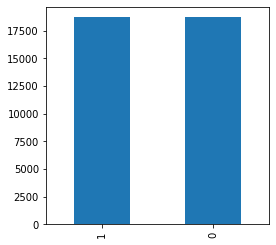

In [5]:
plt.figure(figsize=(4,4))
df['Fault Detection Ground Truth'].value_counts().plot(kind='bar')
plt.show()

Χωρίζουμε σε σύνολα εκπαίδευσης και ελέγχου

In [6]:
X =df.drop(columns = 'Fault Detection Ground Truth').values
y = df['Fault Detection Ground Truth'].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state = 1, stratify = y)

In [7]:
X_train.shape, y_train.shape

((26208, 17), (26208,))

Εισάγουμε από το sci-kit learn τα απαραίτητα για να δοκιμάσουμε μηχανές διανυσμάτων στήριξης

In [8]:
from sklearn.svm import SVC
svm_clf = SVC()

Ας δούμε την πιο απλή περίπτωση αρχικά

In [9]:
svm_clf.fit(X_train, y_train)

SVC()

In [10]:
predicted = svm_clf.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      5616
           1       0.97      0.71      0.82      5616

    accuracy                           0.85     11232
   macro avg       0.87      0.85      0.84     11232
weighted avg       0.87      0.85      0.84     11232



Αρκετά καλά, αλλά παρατηρούμε ότι η ακρίβεια προβλέψεων για το 1 είναι αρκετά μεγαλύτερη από του 0, ενώ το αντίστροφο ισχύει για την ανάκληση 

Ο ταξινομητής μας χρησιμοποιεί τον προεπιλεγμένο πυρήνα
( kernel='rbf' ), ο οποίος μπορεί να ξεχωρίσει μη
γραμμικώς διαχωρίσιμα δεδομένα. Μήπως τα δεδομένα είναι γραμμικώς διαχωρίσιμα;

In [ ]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
predicted = svm_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5616
           1       0.98      0.77      0.87      5616

    accuracy                           0.88     11232
   macro avg       0.90      0.88      0.88     11232
weighted avg       0.90      0.88      0.88     11232



Λίγο καλύτερα αποτελέσματα απο πριν

Οι κατανομές των χαρακτηριστικών όπως είδαμε διαφέρουν. Θα ήταν καλό να κανονικοποιήσουμε τα δεδομένα. Μία καλή επιλογή είναι ο StandardScaler, που μετατρέπει κάθε στήλη ώστε να έχει μέση τιμή 0 και διακύμανση 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Εκτός απο τις μηχανές διανυσμάτων στήριξης, μπορούμε να δοκιμάσουμε και άλλες μεθόδους μηχανικής μάθησης. Μια απο αυτές είναι η στοχαστική κάθοδος κλίσης (SGD). Εσωτερικά δημιουργεί μια γραμμική συνάρτηση, η οποία με βάση τα χαρακτηριστικά των δεδομένων μας υπολογίζει τον στόχο (κλάση) που θέλουμε. Στη διάρκεια της εκπαίδευσης, η συνάρτηση αυτή θα βγάζει (μάλλον) λάθος προβλέψεις. Εμείς θέλουμε να ελαχιστοποιήσουμε αυτό το λάθος, το οποίο ονομάζεται απώλεια (loss). Από τη μαθηματική ανάλυση ξέρουμε ότι για να ελαχιστοποιήσουμε μια συνάρτηση χρησιμοποιούμε παραγώγους. Η παράγωγος μιας συνάρτησης μας σε ένα σημείο μας δίνει την
κλίση στο σημείο αυτό.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(X_train_scaled, y_train)
predicted = sgd_clf.predict(X_test_scaled)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5616
           1       0.98      0.79      0.88      5616

    accuracy                           0.89     11232
   macro avg       0.90      0.89      0.89     11232
weighted avg       0.90      0.89      0.89     11232



Με το train_test_split() μας απλοποιείται η διαδικασία της
δημιουργίας δεδομένων εκπαίδευσης και ελέγχου.Υπάρχει όμως ένα θέμα.
 Αφού τα αποτελέσματα εκπαίδευσης και ελέγχου είναι αποτέλεσμα
τυχαίας δειγματοληψίας, η αποτίμηση που έχουμε (π.χ. με το
classification_report() ) θα εξαρτάται από τη
δειγματοληψία.
 Πράγματι, αν τρέξουμε το παρόν σημειωματάριο επαναλαμβόμενες
φορές χωρίς να ορίζουμε random_state θα παίρνουμε διαφορετικά
αποτελέσματα.

Για να έχουμε λοιπόν καλύτερη εκτίμηση της απόδοσης του
ταξινομητή μας, μπορούμε να χρησιμοποιήσουμε μια άλλη
προσέγγιση.Στην μέθοδο της διασταυρωμένης επικύρωσης k-πτυχών (k-fold cross
validation), πραγματοποιούμε όχι έναν, αλλά k ελέγχους. Σε κάθε μία από τις επικυρώσεις παίρνουμε μία διαφορετική πτυχή (ή φέτα) που περιέχει 1/k των δεδομένων μας, κρατάμε την πτυχή για έλεγχο, και τα υπόλοιπα τα χρησιμοποιούμε για εκπαίδευση.

In [ ]:
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier(random_state=1234)
scores = cross_val_score(sgd_clf, X, y, cv=5)
scores

array([0.60523504, 0.49706197, 0.91132479, 0.62526709, 0.94951923])

Εποπτικά η απόδοση του ταξινομητή είναι

In [ ]:
print(scores.mean(), scores.std())

0.7176816239316239 0.1795015670108599


 Για να γίνονται όλα σωστά και με τη σειρά, μπορούμε να
χρησιμοποιήσουμε τη δυνατότητα της διασωλήνωσης (ή διοχέτευσης,
pipeline) που μας προσφέρει το scikit-learn.

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=1234))
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.79941239, 0.88207799, 0.98798077, 0.58787393, 0.94257479])

In [ ]:
print(scores.mean(), scores.std())

0.8399839743589743 0.14100025469189478


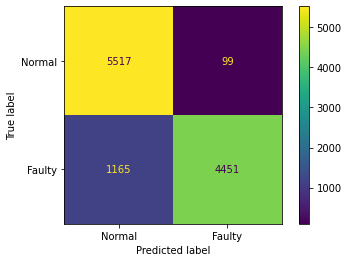

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Faulty"])
disp.plot()

plt.show()